In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Ultimate Programming\Data Bases\Banking Data.xlsx")

In [3]:
df.head(3)

,Client ID,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,...,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
0,PKR81288,Raymond Mills,24,Male,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,Victor Dean,...,1,484.5440,7.762429e+05,1.485829e+06,603617.883648,607332.455240,12249.9584,1.134475e+06,1,2
1,PKR65833,Julia Spencer,23,Male,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,Jeremy Porter,...,1,2256.8777,1.270615e+06,6.414828e+05,229521.365073,344635.157402,61162.3089,2.000526e+06,1,3
2,PKR47499,Stephen Murray,27,Female,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,Ernest Knight,...,2,4568.7438,1.052716e+06,1.033402e+06,652674.690576,203054.348179,79071.7794,5.481376e+05,1,3


In [4]:
print(df.isnull().sum().sum())
print(df.shape)

0
(3000, 25)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Sex                       3000 non-null   object        
 4   Location ID               3000 non-null   int64         
 5   Joined Bank               3000 non-null   datetime64[ns]
 6   Banking Contact           3000 non-null   object        
 7   Nationality               3000 non-null   object        
 8   Occupation                3000 non-null   object        
 9   Investment Advisor        3000 non-null   object        
 10  Fee Structure             3000 non-null   object        
 11  Loyalty Classification    3000 non-null   object        
 12  Banking Relationship

In [6]:
df.describe()

,Age,Location ID,Joined Bank,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,21563.323000,2006-01-27 22:29:45.600000128,171305.034094,25531.599673,1.463667,3176.206780,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529774,8.667598e+05,1.518667,2.249333
min,17.000000,12.000000,1992-05-23 00:00:00,15919.475400,1482.030000,1.000000,1.174800,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,44.998400,0.000000e+00,0.000000,1.000000
25%,34.000000,10803.500000,1998-12-30 18:00:00,82906.594300,12513.775000,1.000000,1236.633525,2.396281e+05,2.044004e+05,1.199475e+05,7.479441e+04,11916.546400,3.748251e+05,1.000000,1.000000
50%,51.000000,21129.500000,2006-02-11 00:00:00,142313.479600,22357.355000,1.000000,2560.800750,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.187200,7.113147e+05,2.000000,2.000000
75%,69.000000,32054.500000,2013-03-06 00:00:00,242290.306650,35464.740000,2.000000,4522.633050,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.390700,1.185110e+06,2.000000,3.000000
max,85.000000,43369.000000,2019-09-12 00:00:00,522330.259200,75963.900000,3.000000,13991.994000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.866000,3.825962e+06,3.000000,5.000000
std,19.854760,12462.273017,NaN,111935.808260,16259.950770,0.676387,2497.094724,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924007,6.412303e+05,1.102145,1.131191


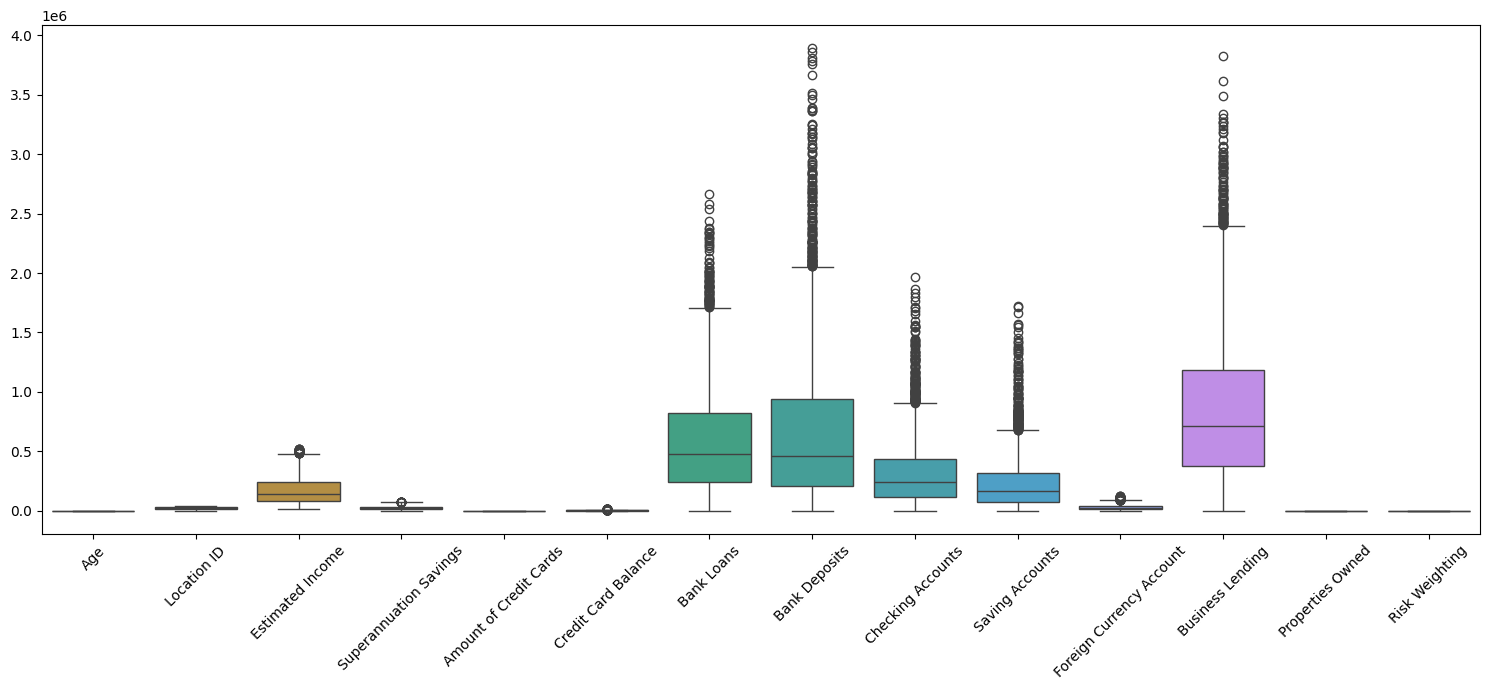

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df['Saving Accounts'] = df['Saving Accounts'].replace(",","")

In [10]:
df.shape

(3000, 25)

In [11]:
    q1 = df['Saving Accounts'].quantile(.25)
    q3 = df['Saving Accounts'].quantile(.75)
    iqr = q3 - q1
    min_r = q1 - (iqr*1.5)
    max_r = q3 + (iqr*1.5)
    df = df[(df['Saving Accounts'] >= min_r) & (df['Saving Accounts'] <= max_r)]

In [12]:
df.shape

(2845, 25)

In [13]:
df.head()

,Client ID,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,...,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
0,2333,2289,24,1,34324,2019-05-06,3,1,144,19,...,1,484.5440,7.762429e+05,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2
1,1798,1579,23,1,42205,2001-12-10,25,0,154,8,...,1,2256.8777,1.270615e+06,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3
2,1165,2646,27,0,7314,2010-01-25,1,4,87,3,...,2,4568.7438,1.052716e+06,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3
3,2045,2833,40,1,34594,1993-03-28,45,1,79,2,...,2,4205.0010,1.211951e+05,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4
4,1624,2012,46,0,41269,2012-07-20,42,1,24,11,...,1,3779.4880,1.048302e+06,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
columns_to_scale = ['Credit Card Balance', 'Banking Contact', 'Nationality', 'Occupation', 'Investment Advisor']
mms = MinMaxScaler()
mms.fit(df[columns_to_scale])

MinMaxScaler()

In [16]:
scaled_data = mms.transform(df[columns_to_scale])
df[columns_to_scale] = scaled_data

In [18]:
df.head()

,Client ID,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,...,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
0,2333,2289,24,1,34324,2019-05-06,0.062500,0.25,0.742268,0.904762,...,1,0.034549,7.762429e+05,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2
1,1798,1579,23,1,42205,2001-12-10,0.520833,0.00,0.793814,0.380952,...,1,0.161227,1.270615e+06,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3
2,1165,2646,27,0,7314,2010-01-25,0.020833,1.00,0.448454,0.142857,...,2,0.326469,1.052716e+06,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3
3,2045,2833,40,1,34594,1993-03-28,0.937500,0.25,0.407216,0.095238,...,2,0.300470,1.211951e+05,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4
4,1624,2012,46,0,41269,2012-07-20,0.875000,0.25,0.123711,0.523810,...,1,0.270057,1.048302e+06,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3


# Function Transformation

In [28]:
from sklearn.preprocessing import FunctionTransformer
ff = FunctionTransformer(func=np.log1p)
ff.fit(df[columns_to_scale])

FunctionTransformer(func=<ufunc 'log1p'>)

In [29]:
scaled_data = ff.transform(df[columns_to_scale])
df[columns_to_scale] = scaled_data

In [30]:
df.head()

,Client ID,Name,Age,Sex,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Investment Advisor,...,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
0,2333,2289,24,1,34324,2019-05-06,0.058858,0.201424,0.441596,0.497349,...,1,0.033402,7.762429e+05,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2
1,1798,1579,23,1,42205,2001-12-10,0.350135,0.000000,0.460171,0.279731,...,1,0.139308,1.270615e+06,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3
2,1165,2646,27,0,7314,2010-01-25,0.020410,0.526589,0.315173,0.125338,...,2,0.248827,1.052716e+06,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3
3,2045,2833,40,1,34594,1993-03-28,0.507660,0.201424,0.293873,0.087069,...,2,0.233273,1.211951e+05,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4
4,1624,2012,46,0,41269,2012-07-20,0.487726,0.201424,0.110321,0.351511,...,1,0.214354,1.048302e+06,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3


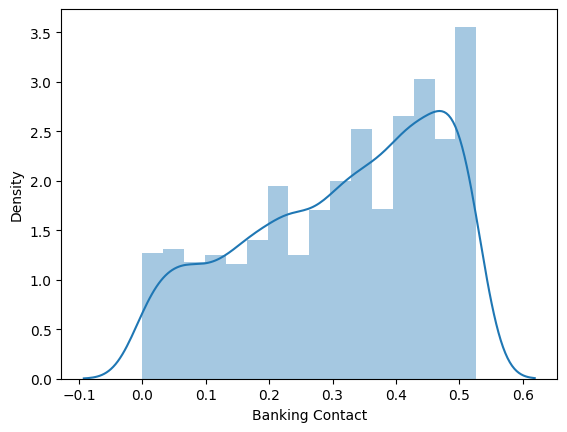

In [31]:
sns.distplot(df['Banking Contact'])
plt.show()